> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Ever wonder why is the scheduling for a doctor's appointment always so packed even when the hospital/clinic does not shows to be as packed? Who's fault is it that results in the no-show in appointment?

This dataset would provide an insight on who what are the factors that might result in the patient not showing up for their scheduled appointment.


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis

The questions that we aim to answer with this analysis is:
- Question 1: Is there a relationship between the time in advance the patient schedule the appointment against the showing up of the patient?
- Question 2: Which age-group shows a highest percentage within the no-show category?

>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

Load the dataset of 'No-show appointments' from csv to DataFrame

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
appointment_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Perform checking on the columns to ensure that the file in imported correctly into its respective fields.

In [4]:
appointment_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


When looking at the info of the data, we noticed that all columns have the same number of rows implying that there are no null datas within the data set.

In [6]:
appointment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the describe function, we noted that there is a negative-aged data. As it is impossible for age to have a negative value, assessment would need to be done on this data.

As Handcap field is a binary imput, it should have values of either 1 or 0. Hence, having the value of 4 implied that there might be issues with the data. Hence, further checking would need to be performed.

Prior to performing cleaning of the data, we would also assess for any duplicates of data.

In [7]:
appointment_df.duplicated().sum()

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Convert header to lower caps
appointment_df.columns = appointment_df.columns.str.lower()
appointment_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Changing 'AppointmentID' and 'PatientId' column to string as no computation should be done on the fields 
appointment_df['appointmentid'] = appointment_df['appointmentid'].astype(str)
appointment_df['patientid'] = appointment_df['patientid'].astype(str)

In [10]:
# Convert 'scheduleday' and 'appointmentday' to datetime
appointment_df['scheduledday'] =  pd.to_datetime(appointment_df['scheduledday'])
appointment_df['appointmentday'] =  pd.to_datetime(appointment_df['appointmentday'])
appointment_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Next, we ensure that the fields have been changed correctly. 
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns, UTC]
appointmentday    110527 non-null datetime64[ns, UTC]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(5)
memory usage: 11.8+ MB


In [12]:
# As there are individuals with the age of negative value, we will check for the number of  negative aged entry
appointment_df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [13]:
# Since there is only 1 negative aged entry, we would remove this entry
appointment_df.drop(index=99832,axis=0,inplace=True)

As there are handcap with the value more than 1, we will check for any non-binary number within the binary fields.


To ease our checking, we will create a binary test function for ease of binary checking.

(Note: this binary test kit can only be used to check for fields that is expected to have 0 or 1 values only.)

In [14]:
def binary_test(df,column):
    x= df.query('{} != [0,1]'.format(column))['{}'.format(column)].count()
    if x == 0:
        print("The {} field is binary".format(column))
    else:
        print("The {} field is NOT binary where it consists of {} non-binary results".format(column,x))

In [15]:
binary_test(appointment_df,'handcap')

The handcap field is NOT binary where it consists of 199 non-binary results


As the number of rows of non-binary handcap data is small 0.2% (199/110526), we would suggest to drop these rows.
However, prior to dropping these rows, we would assess on other binary inputs and on whether are there any relationship on the non-binary 'Patient ID' on other fields.

Next, we would ensure that the other binary fields do not have non-binary inputs as well.

In [16]:
appointment_df.groupby('gender')['patientid'].count()

gender
F    71839
M    38687
Name: patientid, dtype: int64

Next, we create a list of binary fields which we intend to perform testing on:

In [17]:
list_binary = ['scholarship','hipertension','diabetes','alcoholism','sms_received']

for items in list_binary:
    binary_test(appointment_df,items)

The scholarship field is binary
The hipertension field is binary
The diabetes field is binary
The alcoholism field is binary
The sms_received field is binary


Since handcap is the only binary field with odd input with small impact on the total, we would proceed to drop the rows.

In [18]:
appointment_df.drop(appointment_df.query('handcap != [0,1]')['patientid'].index.tolist(),axis=0,inplace=True)

In [19]:
appointment_df.reset_index(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Is there a relationship between the time in advance the patient schedule the appointment against the showing up of the patient?

To begin the testing on the relationship between the time in advance of the patient booking against the showing up of the patient, we would firstly compute the number of hours in regards to advance bookings.

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
appointment_df['advance_hours'] = appointment_df['appointmentday']-appointment_df['scheduledday']
appointment_df['advance_hours'] = appointment_df['advance_hours'].apply(lambda x : x.total_seconds()/60/60)
appointment_df.head()

,index,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,advance_hours
0,0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-18.635556
1,1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-16.140833
2,2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-16.317778
3,3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-17.491944
4,4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-16.123056


In [21]:
appointment_df['advance_hours'].describe()

count    110327.000000
mean        233.221549
std         365.925516
min        -157.822222
25%          -8.306667
50%          83.572778
75%         343.732361
max        4285.316944
Name: advance_hours, dtype: float64

Based on the computed fields, we noted that there are instances where the scheduling is done after the appointment day (where advance hours field shows a negative amount). 
However, as the appointment day does not account for time, the appointment on the same day would show a negative advance time ranging from 0 hours to -24 hours.
Any data with advance hours less than -24 would be evaluated as it is impossible to book an appointment for the previous day.

In [22]:
appointment_df.query('advance_hours <= -24 ').count()

index             5
patientid         5
appointmentid     5
gender            5
scheduledday      5
appointmentday    5
age               5
neighbourhood     5
scholarship       5
hipertension      5
diabetes          5
alcoholism        5
handcap           5
sms_received      5
no-show           5
advance_hours     5
dtype: int64

As there are only 5 lines which returns an advance hour lesser than 24, we would proceed to drop the lines.

In [23]:
#drop the 5 rows identified
appointment_df.drop(appointment_df.query('advance_hours <= -24 ').index.tolist(),axis=0,inplace=True)

In [24]:
# Check the count to ensure that 5 rows have been removed
appointment_df['advance_hours'].describe()

count    110322.000000
mean        233.234839
std         365.928334
min         -20.748333
25%          -8.306667
50%          83.637500
75%         343.747639
max        4285.316944
Name: advance_hours, dtype: float64

Subsequently, we would compute the advance days where amount ranging from 0 to -24 hours would be deemed to have advance days of 0.

In [25]:
# Create the advance days field
appointment_df['advance_days'] = appointment_df['advance_hours'].apply(lambda x : x/24)
appointment_df.head()

,index,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,advance_hours,advance_days
0,0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-18.635556,-0.776481
1,1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-16.140833,-0.672535
2,2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-16.317778,-0.679907
3,3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-17.491944,-0.728831
4,4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-16.123056,-0.671794


In [26]:
# Move out the negative advance days rows to a separate data frame
same_day = appointment_df.query('advance_days < 0')
appointment_df.drop(appointment_df.query('advance_days < 0').index.tolist(),axis=0,inplace=True)

In [27]:
# Check the minimum amount of advance days to ensure that it is not less than -24
same_day['advance_days'].min()

-0.8645138888888889

In [28]:
# Convert all advance days to 0.01.
# Zero is not used as same day scheduling is to be included within the same month bucket
same_day['advance_days'] = 0.01

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Append back the full data
appointment_df = appointment_df.append(same_day)

In [30]:
# Check the number of rows after appending back the data 
appointment_df.describe()

,index,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,advance_hours,advance_days
count,110322.000000,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,55259.554568,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,233.234839,9.877016
std,31907.326495,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,365.928334,15.142095
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.748333,0.010000
25%,27629.250000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.306667,0.010000
50%,55255.500000,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.637500,3.484896
75%,82898.750000,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,343.747639,14.322818
max,110526.000000,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4285.316944,178.554873


After wrangling the data for advanced days, we would then create additional columns and perform our visualisation.

In [31]:
# Creating a column for whether does the customer show up
appointment_df['show'] = appointment_df['no-show'].apply(lambda x : 1 if x == 'No' else 0)

In [32]:
# Creating a day and month counter for the time between scheduling and actual appointment
appointment_df['round_month'] = ((appointment_df['advance_days']/30).apply(np.ceil)-1).astype(int)

In [33]:
appointment_df.head()

,index,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,advance_hours,advance_days,show,round_month
5,5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,39.385833,1.641076,1,0
6,6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,32.913333,1.371389,0,0
7,7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,32.333889,1.347245,0,0
9,9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,35.193056,1.466377,1,0
10,10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,33.030278,1.376262,1,0


In [34]:
# Create the total counter grouped by month
grouped_totalm = appointment_df.groupby(['round_month'])['patientid'].count()

In [35]:
# Create the percentage for showed up
grouped_showm = appointment_df.groupby(['round_month'])['show'].sum() / grouped_totalm * 100
grouped_showm

round_month
0    81.136511
1    65.865152
2    71.344717
3    79.545455
4    62.068966
5    67.857143
dtype: float64

In [36]:
# Create the percentage for showed up with SMS-received
grouped_showm_sms = appointment_df.groupby(['round_month'])['show','sms_received'].sum()

grouped_showm_sms['show'] = grouped_showm_sms['show']/grouped_totalm*100
grouped_showm_sms['sms_received'] = grouped_showm_sms['sms_received']/grouped_totalm*100
grouped_showm_sms

,show,sms_received
round_month,,
0,81.136511,29.038067
1,65.865152,61.128565
2,71.344717,64.674493
3,79.545455,65.151515
4,62.068966,55.172414
5,67.857143,66.071429


In [37]:
#Creating a no-show amount which shall be the amount not covered by show up bars
grouped_full = 100
grouped_full

100

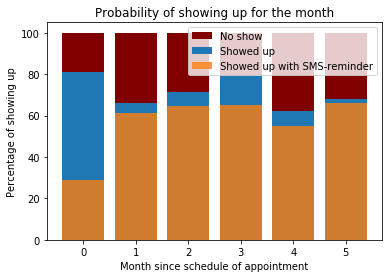

In [38]:
# Create a stacked bar chart
plt.bar(grouped_showm.index,grouped_full,color="Maroon",label="No show")
plt.bar(grouped_showm.index,grouped_showm_sms['show'], label="Showed up")
plt.bar(grouped_showm.index,grouped_showm_sms['sms_received'], label="Showed up with SMS-reminder", alpha =0.8)

plt.legend()
plt.xlabel('Month since schedule of appointment')
plt.ylabel('Percentage of showing up')
plt.title('Probability of showing up for the month');

From the graph, we can see a trend that the longer the time of scheduling from appointment, the higher the chance that the customer would not show up for their appointment.

This is where the SMS reminder comes into play,  as it can be seen that customers who showed up without SMS reminder contributes to a smaller proportion of data for longer time of scheduling from appointment.

### Research Question 2: Which age-group shows a highest percentage within the no-show category?

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Create a new field for the age group for filtering
appointment_df['age_group'] = appointment_df['age'].apply(lambda x : x-(x%15) if x<75 else 75)
appointment_df.head()

,index,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,advance_hours,advance_days,show,round_month,age_group
5,5,95985133231274.0,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,39.385833,1.641076,1,0,75
6,6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,32.913333,1.371389,0,0,15
7,7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,32.333889,1.347245,0,0,30
9,9,78124564369297.0,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,35.193056,1.466377,1,0,15
10,10,734536231958495.0,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,33.030278,1.376262,1,0,30


In [40]:
# Create a counter for each age-group
grp=appointment_df.groupby('age_group')['patientid'].count()
grp

age_group
0     23232
15    20812
30    21985
45    23193
60    15214
75     5886
Name: patientid, dtype: int64

In [41]:
# Create the labels to be used for the chart
labels = grp.index.tolist()
labeling = list()

for i in range(len(labels)):
    if labels[i]<75:
        labeling.append("{}-{}".format(labels[i],labels[i]+15))
    else:
        labeling.append("{}+".format(labels[i]))
        break

print(labeling)

['0-15', '15-30', '30-45', '45-60', '60-75', '75+']


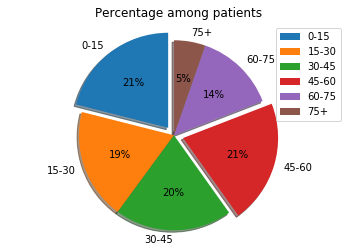

In [42]:
# Configuration of the pie chart
sizes = grp
explode = (0.1, 0, 0, 0.1, 0, 0)  # only "explode" the largest slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labeling, autopct='%1.f%%',shadow=True, explode=explode, startangle = 90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()

plt.title('Percentage among patients')
plt.show()

From the pie chart of the patients, we noticed that most of the patients are within the age range of below 15 and between 45-60  contributing to 21% respectively.

In [43]:
# Create a new DataFrame for no-shows only
no_show_df = appointment_df.query('show == 0')

In [44]:
no_show_df.describe()

,index,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,advance_hours,advance_days,show,round_month,age_group
count,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.000000,22273.0,22273.000000,22273.000000
mean,54169.339963,34.279307,0.115701,0.168275,0.063844,0.030306,0.016343,0.438872,368.371816,15.385835,0.0,0.184708,27.638172
std,31556.308852,21.934180,0.319873,0.374119,0.244481,0.171431,0.126792,0.496260,398.274222,16.559917,0.0,0.477686,21.562454
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.410556,0.010000,0.0,0.000000,0.000000
25%,27728.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.870000,3.452917,0.0,0.000000,15.000000
50%,53363.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,247.866111,10.327755,0.0,0.000000,30.000000
75%,81512.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,543.864444,22.661019,0.0,0.000000,45.000000
max,110516.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4285.316944,178.554873,0.0,5.000000,75.000000


In [45]:
# Create a counter for each age-group
grp_no_show=no_show_df.groupby('age_group')['patientid'].count()
grp_no_show

age_group
0     4920
15    5189
30    4799
45    4143
60    2287
75     935
Name: patientid, dtype: int64

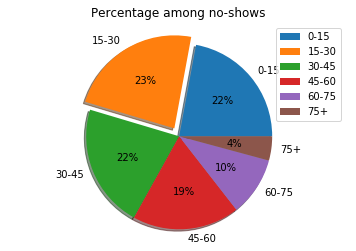

In [46]:
sizes = grp_no_show
explode = (0, 0.1,0, 0, 0, 0)  # only "explode" the largest size

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labeling, autopct='%1.f%%',shadow=True, explode=explode)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend()

plt.title('Percentage among no-shows')
plt.show()

From the pie, it can be seen that the higest percentage of no-shows arise from the age groups of 15-30. When being assessed together with the total proportion or patients, age 15-30 which only ranked 4th of its patients' proportion have the highest percentage of no-shows. 
Thus, it is fair to conclude that the most no shows in percentage of their respective group arise from age 15-30.

<a id='conclusions'></a>
## Conclusions

As a conclusions, it can be seen that show up of appointment would be slighly impacted by having a schedule date far from the appointment date. 
Also, we can see that SMS reminders does have an impact towards whether or not a patient shows up for a appointment date that is far from the scheduled date. 

Besides that, it can be seen that the top patients comes from the under 15 and the age group 45-60 contributing to 21% respectively. As age bucket of 15-30 shown to have the highest percentage of no-shows abide only contributing to 19% of patients. SMS reminders should be targeted towards this age group.

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!


### Limitations

The limitation of this analysis is that it have yet to accout for the weather on the day of the patient having no show. This is because we expect that the no-show rate would be higher if the day is having a bad weather.

Aside from the limitations from the data available, the current analysis have yet to account for the correlation of scholarship, hipertension, diabetes, and alcoholism as these factors might have some impact on the no-show of the patients.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0